In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
# Membaca data CSV
data1 = pd.read_csv('Case Study - Customer.csv')
data2 = pd.read_csv('Case Study - Product.csv')
data3 = pd.read_csv('Case Study - Store.csv')
data4 = pd.read_csv('Case Study - Transaction.csv')

In [3]:
# Data Cleansing
# Lakukan data cleansing sesuai kebutuhan
# Merubah tipe data Date menjadi datetime
data4['Date'] = pd.to_datetime(data4['Date'], format='%d/%m/%Y')

In [4]:
# Menggabungkan semua data
all_data = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [5]:
# Membuat data baru untuk regression
regression_data = all_data.groupby('Date')['Qty'].sum().reset_index()

In [6]:
# Membuat model machine learning regression (ARIMA)
model = ARIMA(regression_data['Qty'], order=(5, 1, 0))
model_fit = model.fit()
forecast_steps = 365

In [7]:
# Melakukan prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=forecast_steps)

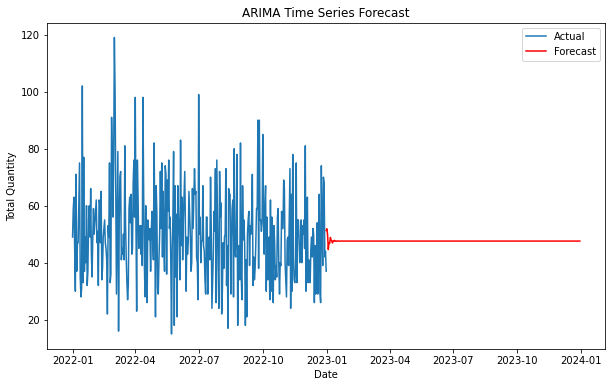

In [8]:
# Visualisasi prediksi
plt.figure(figsize=(10, 6))
plt.plot(regression_data['Date'], regression_data['Qty'], label='Actual')
plt.plot(pd.date_range(start=regression_data['Date'].max(), periods=forecast_steps, freq='D'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('ARIMA Time Series Forecast')
plt.legend()
plt.show()

In [9]:
# Data Cleansing untuk Clustering
all_data['CustomerID'] = all_data['CustomerID'].astype(str)  # Merubah tipe data CustomerID menjadi string

In [10]:
# Membuat data baru untuk clustering
clustering_data = all_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [11]:
# Membuat model machine learning clustering (KMeans)
clustering_features = clustering_data[['TransactionID', 'Qty', 'TotalAmount']]
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(clustering_features)

KMeans(n_clusters=3)

In [12]:
# Menambahkan label klaster ke data
clustering_data['Cluster'] = kmeans_model.labels_

In [13]:
# Menampilkan hasil klastering
print(clustering_data)

    CustomerID  TransactionID   Qty  TotalAmount  Cluster
0          1.0             17  60.0     623300.0        1
1         10.0             14  50.0     478000.0        1
2        100.0              8  35.0     272400.0        0
3        101.0             14  44.0     439600.0        2
4        102.0             15  57.0     423300.0        2
..         ...            ...   ...          ...      ...
443       96.0             12  44.0     355100.0        2
444       97.0             14  36.0     329500.0        2
445       98.0              9  34.0     362500.0        2
446       99.0              9  33.0     316400.0        2
447        nan              0   0.0          0.0        0

[448 rows x 5 columns]


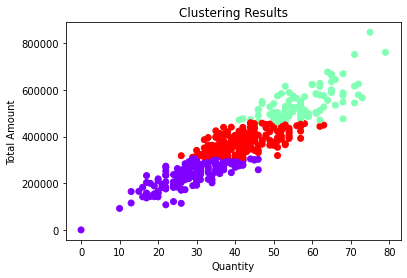

In [14]:
# Visualisasi hasil klastering
plt.scatter(clustering_data['Qty'], clustering_data['TotalAmount'], c=clustering_data['Cluster'], cmap='rainbow')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Clustering Results')
plt.show()